In [6]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/notebooks/data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/notebooks/data/train.csv
/notebooks/data/sample_submission.csv
/notebooks/data/test.csv
/notebooks/data/spaceship-titanic.zip


In [116]:
train_data_raw = pd.read_csv("/notebooks/data/train.csv")
predict_data_raw = pd.read_csv("notebooks/data/test.csv")
test_submission = pd.read_csv("/notebooks/data/sample_submission.csv")

In [4]:
# raw
train_data_raw

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,A/98/P,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,Gravior Noxnuther,False
8689,9278_01,Earth,True,G/1499/S,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,Kurta Mondalley,False
8690,9279_01,Earth,False,G/1500/S,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,Fayey Connon,True
8691,9280_01,Europa,False,E/608/S,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,Celeon Hontichre,False


## File and Data Field Descriptions

**train.csv** - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.    

`PassengerId` - A unique Id for each passenger. Each Id takes the form `gggg_pp` where `gggg` indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.  

`HomePlanet` - The planet the passenger departed from, typically their planet of permanent residence.  

`CryoSleep` - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.  

`Cabin` - The cabin number where the passenger is staying. Takes the form `deck/num/side`, where side can be either `P` for Port or `S` for Starboard.  

`Destination` - The planet the passenger will be debarking to.  

`Age` - The age of the passenger.  

`VIP` - Whether the passenger has paid for special VIP service during the voyage.  

`RoomService`, `FoodCourt`, `ShoppingMall`, `Spa`, `VRDeck` - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.  

`Name` - The first and last names of the passenger.  

`Transported` - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.    

**test.csv** - Personal records for the remaining one-third (~4300) of the passengers, to be used as test data. Your task is to predict the value of Transported for the passengers in this set.
sample_submission.csv - A submission file in the correct format.

`PassengerId` - Id for each passenger in the test set.

`Transported` - The target. For each passenger, predict either True or False.

In [5]:
train_data_raw.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [6]:
train_data_raw.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

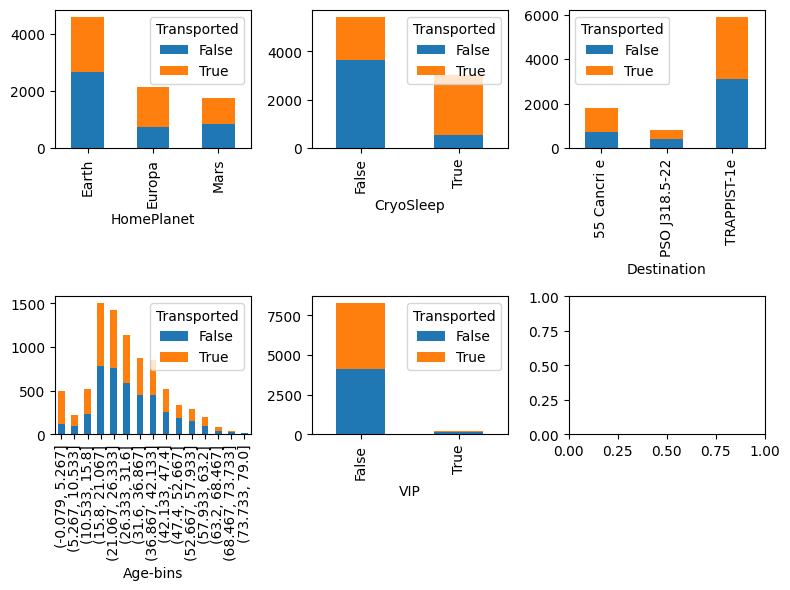

<Figure size 640x480 with 0 Axes>

In [7]:
train_data = train_data_raw.copy()
count = []

homePlanet_count_df = train_data.groupby('HomePlanet')['Transported'].value_counts().unstack()
cryoSleep_count_df = train_data.groupby('CryoSleep')['Transported'].value_counts().unstack()
destination_count_df = train_data.groupby('Destination')['Transported'].value_counts().unstack()
train_data["Age-bins"] = pd.cut(train_data["Age"], bins = 15)
age_count_df = train_data.groupby('Age-bins')['Transported'].value_counts().unstack()
VIP_count_df = train_data.groupby('VIP')['Transported'].value_counts().unstack()

import matplotlib.pyplot as plt
%matplotlib inline
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(8, 6))
plt.figure()
homePlanet_count_df.plot(kind = "bar", stacked=True, ax=axes[0][0])
cryoSleep_count_df.plot(kind = "bar", stacked=True, ax=axes[0][1])
destination_count_df.plot(kind = "bar", stacked=True, ax=axes[0][2])
age_count_df.plot(kind ="bar", stacked=True, ax=axes[1][0])
VIP_count_df.plot(kind ="bar", stacked=True, ax=axes[1][1])
fig.tight_layout()
plt.show()

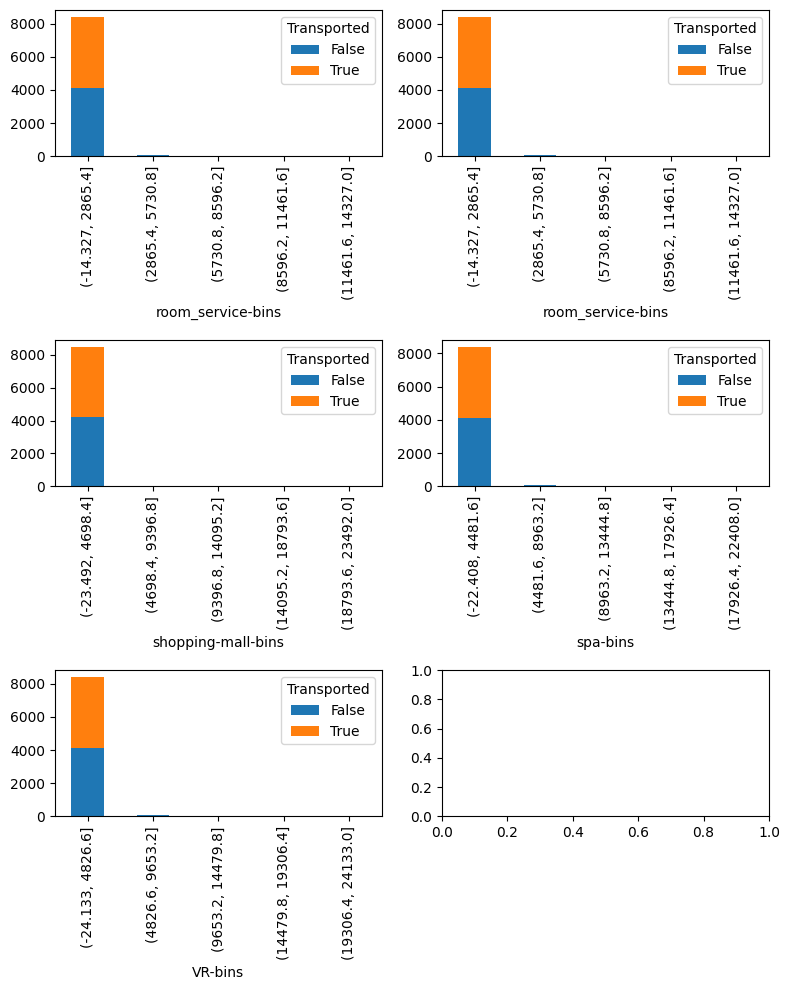

<Figure size 640x480 with 0 Axes>

In [8]:
train_data["room_service-bins"] = pd.cut(train_data["RoomService"], bins = 5)
room_service_count_df = train_data.groupby('room_service-bins')['Transported'].value_counts().unstack()
train_data["food-court-bins"] = pd.cut(train_data["FoodCourt"], bins = 5)
food_court_count_df = train_data.groupby('room_service-bins')['Transported'].value_counts().unstack()
train_data["shopping-mall-bins"] = pd.cut(train_data["ShoppingMall"], bins = 5)
shopping_mall_count_df = train_data.groupby('shopping-mall-bins')['Transported'].value_counts().unstack()
train_data["spa-bins"] = pd.cut(train_data["Spa"], bins = 5)
spa_count_df = train_data.groupby('spa-bins')['Transported'].value_counts().unstack()
train_data["VR-bins"] = pd.cut(train_data["VRDeck"], bins = 5)
vr_deck_count_df = train_data.groupby('VR-bins')['Transported'].value_counts().unstack()
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 10))
plt.figure()
room_service_count_df.plot(kind = "bar", stacked=True, ax=axes[0][0])
food_court_count_df.plot(kind = "bar", stacked=True, ax=axes[0][1])
shopping_mall_count_df.plot(kind = "bar", stacked=True, ax=axes[1][0])
spa_count_df.plot(kind="bar", stacked=True, ax=axes[1][1])
vr_deck_count_df.plot(kind="bar", stacked=True, ax=axes[2][0])
fig.tight_layout()
plt.show()

## Data preprocessing

In [121]:
train_data = train_data_raw.copy()
predict_data = predict_data_raw.copy()

In [122]:
# Creating New Features - Deck, Cabin_num and Side from the column Cabin and remove Cabin
train_data[["Deck", "Cabin_num", "Side"]] = train_data["Cabin"].str.split("/", expand=True)
train_data = train_data.drop('Cabin', axis=1)

# train_data['Deck'] = train_data['Deck'].fillna('0')
train_data['Cabin_num'] = train_data['Cabin_num'].fillna('0').astype(int)
# train_data['Side'] = train_data['Side'].fillna("NA")
train_data

predict_data[["Deck", "Cabin_num", "Side"]] = predict_data["Cabin"].str.split("/", expand=True)
predict_data = predict_data.drop('Cabin', axis=1)

# predict_data['Deck'] = predict_data['Deck'].fillna('0')
predict_data['Cabin_num'] = predict_data['Cabin_num'].fillna('0').astype(int)
# predict_data['Side'] = predict_data['Side'].fillna("NA")

train_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = train_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(-100)
predict_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]] = predict_data[["Age", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]].fillna(-100)
train_data.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Destination     182
Age               0
VIP             203
RoomService       0
FoodCourt         0
ShoppingMall      0
Spa               0
VRDeck            0
Name            200
Transported       0
Deck            199
Cabin_num         0
Side            199
dtype: int64

In [123]:
import math
import random
from itertools import combinations
#preprocessing
def get_subsets(lst, size):
    return list(combinations(lst, size))

def not_in_subset(lst, subset):
    return list(set(lst) - set(subset)) 

features = ["HomePlanet", "CryoSleep", "Age", "VIP", "Destination", "RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck", "Deck", "Cabin_num", "Side"]
subsets = get_subsets(features,11)
len(subsets)
# features = list(subsets[0])

78

## Training

In [128]:
def split_train_test(train_data, features):
    # seperate non-numeric data into columns
    X_data = pd.get_dummies(train_data[features]).astype(float)

    # print(X_data.head())
    # split train and test sets (NOTE: use the whole set before submitting the predictions)
    # X_train = X_data[:math.floor(0.9 * len(train_data))]
    random_state = random.randint(0,100)
    # X_train = X_data[:math.floor(0.9 * len(train_data))]
    X_train = X_data.sample(math.floor(0.9 * len(train_data)), random_state=random_state)
    # X_val = X_data[math.floor(0.9 * len(train_data)):]
    X_val = X_data.drop(X_train.index)
    # y_train = train_data["Transported"][:math.floor(0.9 * len(train_data))]
    y_train = train_data["Transported"].sample(math.floor(0.9 * len(train_data)), random_state=random_state)
    # y_val  = train_data["Transported"][math.floor(0.9 * len(train_data)):]
    y_val = train_data["Transported"].drop(y_train.index)

    return (X_train, y_train, X_val, y_val)

# for prediction
# X_predict = pd.get_dummies(predict_data[features])

In [146]:
X_train, y_train, X_val, y_val = split_train_test(train_data, features)
X_train

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_num,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,...,Deck_A,Deck_B,Deck_C,Deck_D,Deck_E,Deck_F,Deck_G,Deck_T,Side_P,Side_S
362,22.0,28.0,420.0,36.0,6011.0,3.0,13.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
3354,28.0,5.0,2052.0,0.0,3340.0,-100.0,118.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4854,20.0,0.0,0.0,0.0,-100.0,0.0,835.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
2565,-100.0,0.0,0.0,0.0,0.0,0.0,444.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0
8109,14.0,450.0,4791.0,896.0,0.0,0.0,1394.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8368,18.0,0.0,4715.0,0.0,36.0,995.0,342.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6291,23.0,0.0,0.0,0.0,0.0,0.0,1087.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
8533,38.0,1478.0,0.0,631.0,0.0,0.0,598.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
4154,23.0,-100.0,282.0,0.0,0.0,71.0,911.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


### random forests

In [151]:
from sklearn.ensemble import RandomForestClassifier

# for subset in subsets:
    # print(set(features) - set(subset))
# X_train, y_train, X_val, y_val = split_train_test(train_data, features)
X_data = pd.get_dummies(train_data[features]).astype(float)
y_data = train_data["Transported"]
#training
model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=1)
# model.fit(X_train, y_train)
model.fit(X_data, y_data)

#testing
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_val, y_val))}')

pd.DataFrame({'Variable':X_data.columns,
              'Importance':model.feature_importances_}).sort_values('Importance', ascending=False)

train_accuracy = 0.8578550428224466 val_accuracy = 0.8482758620689655


,Variable,Importance
11,CryoSleep_True,0.134002
4,Spa,0.116847
1,RoomService,0.111229
5,VRDeck,0.107020
10,CryoSleep_False,0.099928
2,FoodCourt,0.082932
3,ShoppingMall,0.067319
6,Cabin_num,0.056310
0,Age,0.048594
7,HomePlanet_Earth,0.032472


### logistic regresison

In [131]:
from sklearn.linear_model import LogisticRegression
#Training
X_train, y_train, X_val, y_val = split_train_test(train_data, features)
model = LogisticRegression(random_state=1, max_iter=10000)
model.fit(X_train, y_train)

#Testing
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_val, y_val))}')

train_accuracy = 0.7917678639907964 val_accuracy = 0.7862068965517242


### SVC

In [150]:
from sklearn.svm import SVC

model = SVC(kernel='rbf',  random_state=1)
model.fit(X_train, y_train)

#testing
predictions_train = model.predict(X_train)
predictions_val = model.predict(X_val)
print(f'train_accuracy = {np.mean(np.equal(predictions_train, y_train))} val_accuracy = {np.mean(np.equal(predictions_val, y_val))}')

train_accuracy = 0.7874217052281733 val_accuracy = 0.7850574712643679


## Neural networks

In [136]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from tqdm import tqdm

def batchify_data(x_data, y_data, batch_size):
    """Takes a set of data points and labels and groups them into batches."""
    # Only take batch_size chunks (i.e. drop the remainder)
    N = int(len(x_data) / batch_size) * batch_size
    batches = []
    for i in range(0, N, batch_size):
        batches.append({
            'x': x_data[i:i+batch_size].values,
            'y': y_data[i:i+batch_size].values})
    return batches

def compute_accuracy(predictions, y):
    """Computes the accuracy of predictions against the gold labels, y."""
    return np.mean(np.equal(predictions.numpy(), y))

def run_epoch(data, model, optimizer):
    """Train model for one pass of train data, and return loss, acccuracy"""
    # Gather losses
    losses = []
    batch_accuracies = []

    # If model is in train mode, use optimizer.
    is_training = model.training

    # Iterate through batches
    for batch in tqdm(data):
        # Grab x and y
        x, y = batch['x'], batch['y']

        # Get output predictions
        out = model(torch.tensor(x, dtype = torch.float32))

        # Predict and store accuracy
        predictions = torch.argmax(out, dim=1)
        batch_accuracies.append(compute_accuracy(predictions, y))

        # Compute loss
        loss = F.cross_entropy(out, torch.tensor(y, dtype=torch.long)) + 0.1*sum(torch.norm(p) for p in model.parameters())
        # loss = F.binary_cross_entropy(out, torch.tensor(y, dtype=torch.long))
        losses.append(loss.data.item())

        # If training, do an update.
        if is_training:
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()

    # Calculate epoch level scores
    avg_loss = np.mean(losses)
    avg_accuracy = np.mean(batch_accuracies)
    return avg_loss, avg_accuracy

def train_model(train_data, dev_data, model, lr=0.1, momentum=0.1, nesterov=False, n_epochs=30):
    """Train a model for N epochs given data and hyper-params."""
    # We optimize with SGD
    optimizer = torch.optim.SGD(model.parameters(), lr=lr, momentum=momentum, nesterov=nesterov)
    epochs_i = []
    losses_i = []
    val_losses_i = []
    val_accs_i = []

    for epoch in range(1, n_epochs+1):
        print("-------------\nEpoch {}:\n".format(epoch))

        # Run **training***
        loss, acc = run_epoch(train_data, model.train(), optimizer)
        print('Train loss: {:.6f} | Train accuracy: {:.6f}'.format(loss, acc))
        losses_i.append(loss)
        epochs_i.append(epoch)
        # Run **validation**
        val_loss, val_acc = run_epoch(dev_data, model.eval(), optimizer)
        val_losses_i.append(val_loss)
        val_accs_i.append(val_acc)
        print('Val loss:   {:.6f} | Val accuracy:   {:.6f}'.format(val_loss, val_acc))
        # Save model
        torch.save(model, "/notebooks/spaceship-titanic.pt")
    return losses_i, val_losses_i, val_accs_i, epochs_i

In [137]:
# create batches for SGD
batch_size = 32
train_batches = batchify_data(X_train, y_train, batch_size)
test_batches = batchify_data(X_val, y_val, batch_size)
len(train_batches)

244

In [ ]:
model = nn.Sequential(
    nn.Linear(X_train.shape[1], 128),
    nn.ReLU(),
    nn.Linear(128, 128),
    nn.ReLU(),
    nn.Linear(128,2)
)
# train the model
losses_i, val_losses_i, val_accs, epochs_i = train_model(train_batches, test_batches, model, lr=0.001, momentum = 0.5, nesterov=True, n_epochs = 100)

# # Evaluate the model on test data
loss, accuracy = run_epoch(test_batches, model.eval(), None)

print ("Loss on test set:"  + str(loss) + " Accuracy on test set: " + str(accuracy))

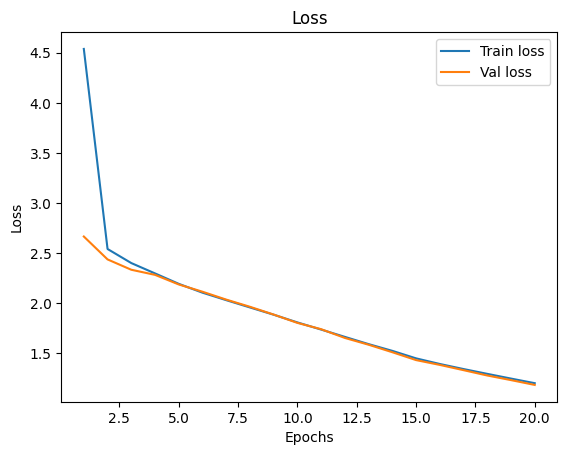

In [139]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.title("Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.plot(epochs_i, losses_i, label = "Train loss")
plt.plot(epochs_i, val_losses_i, label = "Val loss")
plt.legend()
plt.show()

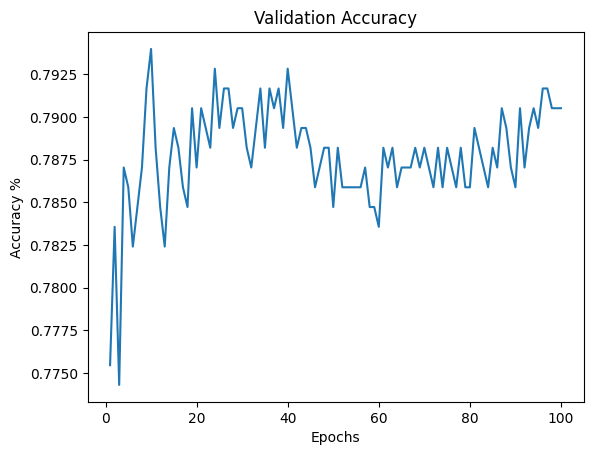

In [142]:
plt.figure()
plt.title("Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy %")
plt.plot(epochs_i, val_accs)
plt.show()

In [144]:
predict_data

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Deck,Cabin_num,Side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez,F,5,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4272,9266_02,Earth,True,TRAPPIST-1e,34.0,False,0.0,0.0,0.0,0.0,0.0,Jeron Peter,G,1496,S
4273,9269_01,Earth,False,TRAPPIST-1e,42.0,False,0.0,847.0,17.0,10.0,144.0,Matty Scheron,NaN,0,NaN
4274,9271_01,Mars,True,55 Cancri e,-100.0,False,0.0,0.0,0.0,0.0,0.0,Jayrin Pore,D,296,P
4275,9273_01,Europa,False,NaN,-100.0,False,0.0,2680.0,0.0,0.0,523.0,Kitakan Conale,D,297,P


In [145]:
X_predict = pd.get_dummies(predict_data[features]).astype(float)

predictions = model.predict(X_predict)
output = pd.DataFrame({'PassengerId': predict_data.PassengerId, 'Transported': predictions})
output.to_csv('/notebooks/submission.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!
